In [1]:
# Import Libraries
from nltk.corpus import stopwords
set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

import matplotlib.pyplot as plt

import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import sklearn as sk
import math
import itertools
import random
from sklearn.model_selection import train_test_split
import pprint, time

In [2]:
# Folder Path - Derive the path using system properties:
        #cwd = os.getcwd()
        #print("Current Working Directory: ", cwd)
        #path = ''
        #path = os.getcwd() + '\stories'
        #print("PATH: ", path)
        
# Change the directory to 'stories'
path = r'C:\Users\niranjans3ln\01 BITS Pilani\Assignments\Text Mining\stories'
os.chdir(path)

# Read text File and Print
def print_text_file_content(file_path):
    with open(file_path, 'r') as f:
        print(f.read())
        
# Read text File and Return
def read_text_file_content(file_path):
    with open(file_path, 'r') as f:
        return f.read()

In [3]:
# Array of Stories
stories_whole = []
stories = []
filenames = []
filepaths = []
dataset = []

alpha = 0.3

In [4]:
# iterate through all files
for file in os.listdir():
    # Check whether file is in text format or not. However we have multiple extensions for our story files, hence the file extension check is not necessary.
    #if file.endswith(".txt"):
    
    file_path = f"{path}\{file}"
    #print('File: ', file_path)

    # Print Text File Content
    # print_text_file_content(file_path)

    # Get Text File Name and Content to 2D Array
    col = []
    col.append(file)
    col.append(read_text_file_content(file_path))
    stories_whole.append(col)
    stories.append(read_text_file_content(file_path))
    filenames.append(file)
    filepaths.append(file_path)
    dataset.append((file_path, file, read_text_file_content(file_path)))
        
print('# of Stories: ', len(stories))

# of Stories:  12


In [5]:
import pandas as pd
df = pd.DataFrame({'filepath': filepaths, 'filename': filenames, 'story': stories})
#print(df)
df.head()

print(len(dataset))

12


In [6]:
def print_doc(id):
    print(dataset[id])
    file = open(dataset[id][0], 'r', encoding='cp1250')
    text = file.read().strip()
    file.close()
    print(text)

In [7]:
N = len (dataset)

## Preprocessing

### 1) Remove Stopwords

In [8]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

### 2) Remove the Punctuations, Special Characters, Convert text to Lower Case

In [9]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [10]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [11]:
def convert_lower_case(data):
    return np.char.lower(data)

In [12]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [13]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [14]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

## Data Extraction

In [15]:
# Run at least once the following scripts to download STOPWORDS and PUNKT. Subsequent downloads are not necessary.
#nltk.download('stopwords')
#nltk.download('punkt')

processed_text = []

for i in dataset[:N]:
    file = open(i[0], 'r', encoding="utf8", errors='ignore')
    text = file.read().strip()
    file.close()

    processed_text.append(word_tokenize(str(preprocess(text))))

## Calculating DF for all words

In [16]:
DF = {}

for i in range(N):
    tokens = processed_text[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
            DF[w] = {i}
        
for i in DF:
    DF[i] = len(DF[i])

In [17]:
DF

{'children': 3,
 'sli': 2,
 'fox': 1,
 'mr': 5,
 'rabbit': 2,
 'sat': 8,
 'front': 4,
 'porch': 1,
 'rock': 3,
 'eat': 5,
 'great': 8,
 'big': 7,
 'carrot': 1,
 'look': 9,
 'like': 11,
 'come': 11,
 'road': 4,
 'said': 10,
 'walk': 9,
 'end': 8,
 'shade': 2,
 'eye': 9,
 'paw': 1,
 'exclaim': 5,
 'good': 9,
 'morn': 8,
 'cri': 7,
 'across': 7,
 'yard': 5,
 'repli': 6,
 'slight': 4,
 'frown': 1,
 'face': 9,
 'well': 11,
 'havent': 3,
 'seen': 8,
 'long': 9,
 'time': 11,
 'thought': 9,
 'would': 9,
 'stop': 7,
 'chat': 2,
 'could': 11,
 'rude': 2,
 'home': 8,
 'even': 9,
 'enemi': 3,
 'offer': 7,
 'seat': 3,
 'take': 8,
 'chair': 5,
 'polit': 3,
 'stay': 8,
 'leav': 8,
 'ask': 8,
 'mother': 3,
 'dinner': 2,
 'tonight': 2,
 'wont': 7,
 'three': 10,
 'littl': 10,
 'rab': 1,
 'oh': 5,
 'know': 7,
 'want': 10,
 'us': 10,
 'pretend': 3,
 'disappoint': 2,
 'sorri': 5,
 'engag': 5,
 'today': 4,
 'tomorrow': 2,
 'chuckl': 5,
 'inwardli': 1,
 'readili': 2,
 'agr': 5,
 'next': 6,
 'day': 10,
 'wish

In [18]:
total_vocab_size = len(DF)

In [19]:
total_vocab_size

4118

In [20]:
total_vocab = [x for x in DF]

In [21]:
print(total_vocab[:20])

['children', 'sli', 'fox', 'mr', 'rabbit', 'sat', 'front', 'porch', 'rock', 'eat', 'great', 'big', 'carrot', 'look', 'like', 'come', 'road', 'said', 'walk', 'end']


## N-Grams

### 3) Create Bigrams. List 10 most frequent bigrams

In [22]:
processed_text_merged = {}
words_merged = []
counter = 0
for items in processed_text:
    for word in items:
        processed_text_merged[counter] = word
        words_merged.append(word)
        #rint(word)
        counter +=1
        
print('processed_text_merged length: ',len(processed_text_merged))
print('words_merged length: ',len(words_merged))

processed_text_merged length:  21193
words_merged length:  21193


In [23]:
words_merged[25:55]

['eye',
 'paw',
 'exclaim',
 'sli',
 'fox',
 'good',
 'morn',
 'mr',
 'rabbit',
 'cri',
 'sli',
 'fox',
 'walk',
 'across',
 'yard',
 'good',
 'morn',
 'repli',
 'mr',
 'rabbit',
 'slight',
 'frown',
 'face',
 'well',
 'said',
 'sli',
 'fox',
 'havent',
 'seen',
 'long']

### 10 most-frequent Bigrams:

In [24]:
# Bigrams
bigram_series = (pd.Series(nltk.ngrams(words_merged, 2)).value_counts())[:10]
bigram_series

(mr, holm)          43
(said, holm)        42
(sli, fox)          26
(sherlock, holm)    23
(littl, pig)        22
(sinbad, sailor)    19
(one, day)          18
(mr, rabbit)        16
(mr, soam)          16
(masser, holm)      16
dtype: int64

Text(0.5, 0, '# of Occurances')

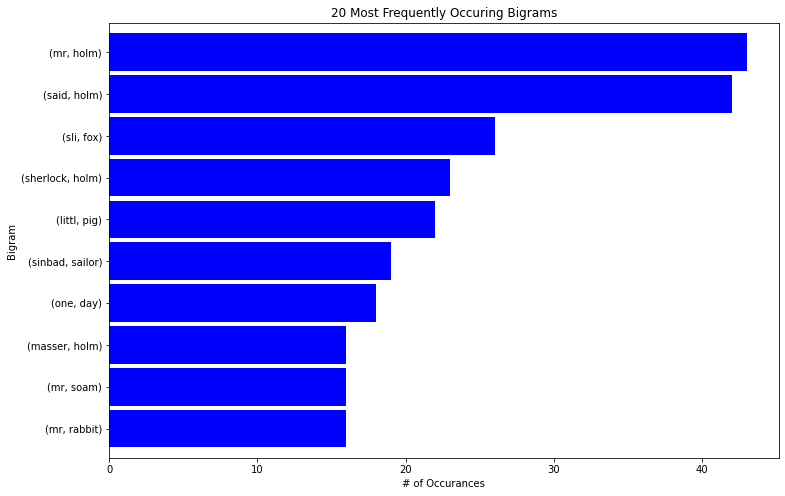

In [25]:
bigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

## 4) Implementing / Calculating TF-IDF 

### TF-IDF From Scratch

In [26]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

In [27]:
# TF-IDF Function From Scratch...
def tf_idf_function(len_n, processed_text_input): #len_n = dataset length, processed_text_input
    tf_idf_result = {}
    story_index = 0
    
    for i in range(len_n):
        tokens = processed_text_input[i]
        counter = Counter(tokens)
        words_count = len(tokens)
        
        for token in np.unique(tokens):
            tf = counter[token] / words_count
            df = doc_freq(token)
            idf = np.log((len_n + 1)) / (df + 1)
            tf_idf_result[story_index, token] = tf * idf
            
        story_index += 1
    return(tf_idf_result)

In [28]:
tf_idf_result = tf_idf_function(N, processed_text)

In [29]:
tf_idf_result

{(0, 'across'): 0.0015872211370430301,
 (0, 'agr'): 0.0010581474246953535,
 (0, 'ah'): 0.0005290737123476767,
 (0, 'air'): 0.00039680528426075753,
 (0, 'alarm'): 0.00039680528426075753,
 (0, 'allow'): 0.0006348884548172121,
 (0, 'among'): 0.0010581474246953535,
 (0, 'answer'): 0.000705431616463569,
 (0, 'appl'): 0.002116294849390707,
 (0, 'around'): 0.0006348884548172121,
 (0, 'art'): 0.0006348884548172121,
 (0, 'ask'): 0.000705431616463569,
 (0, 'away'): 0.00028858566128055094,
 (0, 'back'): 0.00031744422740860606,
 (0, 'bag'): 0.0005290737123476767,
 (0, 'bake'): 0.0031744422740860602,
 (0, 'bark'): 0.0010581474246953535,
 (0, 'bay'): 0.002116294849390707,
 (0, 'beat'): 0.0006348884548172121,
 (0, 'becam'): 0.000705431616463569,
 (0, 'bedroom'): 0.0006348884548172121,
 (0, 'began'): 0.0008657569838416528,
 (0, 'begun'): 0.0006348884548172121,
 (0, 'behav'): 0.0010581474246953535,
 (0, 'besid'): 0.00039680528426075753,
 (0, 'beulah'): 0.0015872211370430301,
 (0, 'big'): 0.000793610568

In [30]:
len(tf_idf_result)

8871

In [31]:
processed_text[0]

['children',
 'sli',
 'fox',
 'mr',
 'rabbit',
 'sat',
 'front',
 'porch',
 'rock',
 'eat',
 'great',
 'big',
 'carrot',
 'look',
 'look',
 'like',
 'sli',
 'fox',
 'come',
 'road',
 'said',
 'walk',
 'end',
 'porch',
 'shade',
 'eye',
 'paw',
 'exclaim',
 'sli',
 'fox',
 'good',
 'morn',
 'mr',
 'rabbit',
 'cri',
 'sli',
 'fox',
 'walk',
 'across',
 'yard',
 'good',
 'morn',
 'repli',
 'mr',
 'rabbit',
 'slight',
 'frown',
 'face',
 'well',
 'said',
 'sli',
 'fox',
 'havent',
 'seen',
 'long',
 'time',
 'thought',
 'would',
 'stop',
 'chat',
 'mr',
 'rabbit',
 'could',
 'rude',
 'home',
 'even',
 'enemi',
 'offer',
 'sli',
 'fox',
 'seat',
 'porch',
 'take',
 'chair',
 'said',
 'polit',
 'sli',
 'fox',
 'stay',
 'long',
 'leav',
 'ask',
 'mr',
 'rabbit',
 'mother',
 'good',
 'dinner',
 'tonight',
 'wont',
 'mr',
 'rabbit',
 'three',
 'littl',
 'rab',
 'come',
 'dinner',
 'oh',
 'thought',
 'mr',
 'rabbit',
 'know',
 'littl',
 'rab',
 'want',
 'take',
 'us',
 'eat',
 'us',
 'pretend',


## 5) List top 10 words with highest TF-IDF Values

In [32]:
tf_idf_result_temp = tf_idf_result
tf_idf_result_temp_sorted = sorted(tf_idf_result_temp.items(), key = lambda kv:(kv[0], kv[1]))
tf_idf_result_temp_sorted

[((0, 'across'), 0.0015872211370430301),
 ((0, 'agr'), 0.0010581474246953535),
 ((0, 'ah'), 0.0005290737123476767),
 ((0, 'air'), 0.00039680528426075753),
 ((0, 'alarm'), 0.00039680528426075753),
 ((0, 'allow'), 0.0006348884548172121),
 ((0, 'among'), 0.0010581474246953535),
 ((0, 'answer'), 0.000705431616463569),
 ((0, 'appl'), 0.002116294849390707),
 ((0, 'around'), 0.0006348884548172121),
 ((0, 'art'), 0.0006348884548172121),
 ((0, 'ask'), 0.000705431616463569),
 ((0, 'away'), 0.00028858566128055094),
 ((0, 'back'), 0.00031744422740860606),
 ((0, 'bag'), 0.0005290737123476767),
 ((0, 'bake'), 0.0031744422740860602),
 ((0, 'bark'), 0.0010581474246953535),
 ((0, 'bay'), 0.002116294849390707),
 ((0, 'beat'), 0.0006348884548172121),
 ((0, 'becam'), 0.000705431616463569),
 ((0, 'bedroom'), 0.0006348884548172121),
 ((0, 'began'), 0.0008657569838416528),
 ((0, 'begun'), 0.0006348884548172121),
 ((0, 'behav'), 0.0010581474246953535),
 ((0, 'besid'), 0.00039680528426075753),
 ((0, 'beulah'),

In [33]:
tf_idf_result_temp_sorted[0]

((0, 'across'), 0.0015872211370430301)

In [34]:
tf_idf_result_temp_sorted[0][0]

(0, 'across')

In [35]:
tf_idf_result_temp_sorted[0][0][0]

0

In [36]:
tf_idf_result_temp_abovezero = {}
counter = 0

for i in tf_idf_result_temp_sorted:
    num, decimal = [str(part) for part in str(i[1]).split('.')]
    key = tf_idf_result_temp_sorted[counter][0]
    val = tf_idf_result_temp_sorted[counter][1]
    
    if (int(num) > 1):
        tf_idf_result_temp_abovezero[key] = val
        #print(key)
        #print(val)
        #print(i[1])
    counter +=1
            
tf_idf_result_temp_abovezero = sorted(dict(tf_idf_result_temp_abovezero).items(), key = lambda kv:(kv[1], kv[0]))


In [37]:
print(len(tf_idf_result_temp_abovezero))
tf_idf_result_temp_abovezero

167


[((9, 'began'), 5.904715480240191e-05),
 ((9, 'set'), 5.904715480240191e-05),
 ((9, 'poor'), 6.49518702826421e-05),
 ((9, 'ran'), 6.49518702826421e-05),
 ((9, 'tri'), 6.49518702826421e-05),
 ((9, 'wind'), 6.49518702826421e-05),
 ((7, 'began'), 6.880413523596494e-05),
 ((11, 'face'), 6.966185109890104e-05),
 ((11, 'part'), 6.966185109890104e-05),
 ((4, 'head'), 7.061307558257726e-05),
 ((4, 'live'), 7.061307558257726e-05),
 ((9, 'becam'), 7.216874475849121e-05),
 ((9, 'caught'), 7.216874475849121e-05),
 ((9, 'direct'), 7.216874475849121e-05),
 ((9, 'drop'), 7.216874475849121e-05),
 ((9, 'leav'), 7.216874475849121e-05),
 ((9, 'mouth'), 7.216874475849121e-05),
 ((9, 'need'), 7.216874475849121e-05),
 ((9, 'return'), 7.216874475849121e-05),
 ((9, 'soon'), 7.216874475849121e-05),
 ((9, 'stay'), 7.216874475849121e-05),
 ((9, 'suddenli'), 7.216874475849121e-05),
 ((9, 'watch'), 7.216874475849121e-05),
 ((9, 'young'), 7.216874475849121e-05),
 ((7, 'ran'), 7.568454875956142e-05),
 ((7, 'tri'), 7

#### The 10 words with highest TF-IDF Values

##### Note that the words and their weightage appear in descend order below.

In [38]:
i = len(tf_idf_result_temp_abovezero) - 10
for item in tf_idf_result_temp_abovezero:
    print(tf_idf_result_temp_abovezero[i])
    i +=1
    if(i == len(tf_idf_result_temp_abovezero)):
        break

((11, 'sent'), 9.951693014128721e-05)
((11, 'sever'), 9.951693014128721e-05)
((11, 'shake'), 9.951693014128721e-05)
((11, 'shape'), 9.951693014128721e-05)
((11, 'sharp'), 9.951693014128721e-05)
((11, 'someon'), 9.951693014128721e-05)
((11, 'troubl'), 9.951693014128721e-05)
((11, 'understand'), 9.951693014128721e-05)
((11, 'warn'), 9.951693014128721e-05)
((11, 'woman'), 9.951693014128721e-05)


#### However the Unigrams with highest weightage based on the number of times used are...

In [39]:
# Unigrams
(pd.Series(nltk.ngrams(words_merged, 1)).value_counts())[:10]

(one,)      212
(holm,)     196
(said,)     192
(man,)      139
(mr,)       138
(well,)     136
(would,)    124
(upon,)     115
(could,)    109
(come,)     107
dtype: int64

## Perform Part of Speech Tagging

### 6) Label the TF-IDF Dataset

In [41]:
# To use tf_idf_result or words_merged to process the dataset for the tagging.

# Downloading and importing the brown corpus
# nltk.download('brown')
# from nltk.corpus import brown

#download the treebank corpus from nltk
nltk.download('treebank')
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
 
#print the first two sentences along with tags
print(nltk_data[:2])

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\niranjans3ln\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\niranjans3ln\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]
